In [10]:
from itertools import chain
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [25]:

#data_dir = "/badc/cmip6/data/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/1pctCO2/r1i1p1f3/Amon/ua/gn/latest"
data_dir = "/badc/cmip6/data/CMIP6/CMIP/*/*/1pctCO2/r*i1p1f1/Amon/ua/gn/latest"
#r = realization, i = initialization, p = physics, f = forcing
!ls {data_dir}

/badc/cmip6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/1pctCO2/r1i1p1f1/Amon/ua/gn/latest:
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185001-185012.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185101-185112.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185201-185212.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185301-185312.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185401-185412.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185501-185512.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185601-185612.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185701-185712.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185801-185812.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_185901-185912.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_186001-186012.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_186101-186112.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_186201-186212.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_186301-186312.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i1p1f1_gn_186401-186412.nc
ua_Amon_AWI-CM-1-1-MR_1pctCO2_r1i

In [3]:
%%time 
ds = xr.open_mfdataset(data_dir + '/*.nc')
ds

CPU times: user 677 ms, sys: 293 ms, total: 970 ms
Wall time: 3.66 s


<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 325, lon: 432, plev: 19, time: 1800)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1999-12-16 00:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat        (lat) float64 -90.0 -89.44 -88.89 -88.33 ... 88.89 89.44 90.0
  * lon        (lon) float64 0.0 0.8333 1.667 2.5 ... 356.7 357.5 358.3 359.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(240, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(240, 325, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(240, 432, 2), meta=np.ndarray>
    ua         (time, plev, lat, lon) float32 dask.array<chunksize=(240, 19, 325, 432), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-01-14T09:38:14Z
    ...                     ...
    tracking_id:            hdl:21.14100/51b07e3b-44f4-42d8-9070-7742ae62b90b
    variable_id:            ua
    variable_name:          ua
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0

In [4]:
ds_lonmean = ds.mean(dim='lon') #.sel(lon=slice)
ds_lonmean = ds_lonmean.sel(lat=slice(0, 90))
ds_lonmean.time

<xarray.DataArray 'time' (time: 1800)>
array([cftime.Datetime360Day(1850, 1, 16, 0, 0, 0, 0),
       cftime.Datetime360Day(1850, 2, 16, 0, 0, 0, 0),
       cftime.Datetime360Day(1850, 3, 16, 0, 0, 0, 0), ...,
       cftime.Datetime360Day(1999, 10, 16, 0, 0, 0, 0),
       cftime.Datetime360Day(1999, 11, 16, 0, 0, 0, 0),
       cftime.Datetime360Day(1999, 12, 16, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 1999-12-16 00:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [18]:
is_winter = ds_lonmean['time'].dt.season == 'DJF'
ds_lonmean_winter = ds_lonmean.isel(time=is_winter)
ds_lonmean_winter

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 163, plev: 19, time: 450)
Coordinates:
  * time      (time) object 1850-01-16 00:00:00 ... 1999-12-16 00:00:00
  * plev      (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat       (lat) float64 7.629e-06 0.5556 1.111 1.667 ... 88.89 89.44 90.0
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (time, lat, bnds) float64 dask.array<chunksize=(60, 163, 2), meta=np.ndarray>
    lon_bnds  (time, bnds) float64 dask.array<chunksize=(60, 2), meta=np.ndarray>
    ua        (time, plev, lat) float32 dask.array<chunksize=(60, 19, 163), meta=np.ndarray>

In [21]:
ds_lonmean_endyrs = ds_lonmean_winter.sel(time=slice('1969-01-16', '1999-12-16')).mean(dim='time')
ds_lonmean_startyrs = ds_lonmean_winter.sel(time=slice('1850-01-16', '1880-12-16')).mean(dim='time')
ds_lonmean_yrsdiff = ds_lonmean_endyrs - ds_lonmean_startyrs
ds_lonmean_yrsdiff = ds_lonmean_yrsdiff.ua.values
ds_lonmean_yrsdiff

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array([[ 0.23403311,  0.2481618 ,  0.269238  , ...,  0.0348587 ,
         0.01981571,  0.        ],
       [ 0.19623852,  0.20130467,  0.20010614, ..., -0.03407756,
        -0.0254922 ,  0.        ],
       [ 0.52844906,  0.5403819 ,  0.54393077, ..., -0.04111083,
        -0.02740368,  0.        ],
       ...,
       [ 5.480894  ,  5.631889  ,  5.791537  , ...,  0.18815303,
         0.09380901,  0.        ],
       [ 5.638953  ,  5.764434  ,  5.8792377 , ...,  0.4007969 ,
         0.20003319,  0.        ],
       [ 4.5229034 ,  4.658844  ,  4.7825794 , ...,  0.43399   ,
         0.21424043,  0.        ]], dtype=float32)

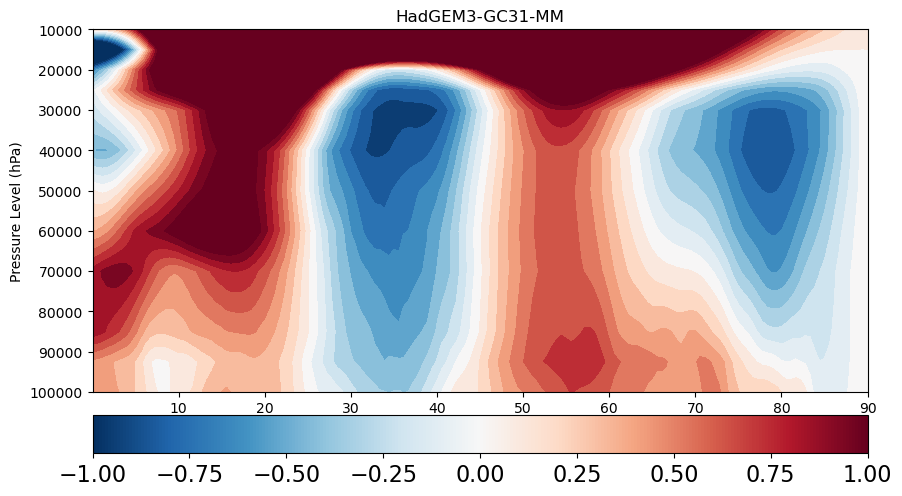

In [15]:
#ds_lonmean.ua.sel(time='1850-01-16').plot()
fig, axes = plt.subplots(nrows=1, ncols=1) #, figsize=(15,15))
ax = plt.subplot(1,1,1)
cmap = plt.get_cmap('RdBu_r')
plt.contourf(ds_lonmean.lat, ds_lonmean.plev, ds_lonmean_yrsdiff, cmap='RdBu_r', levels=np.arange(-1,1,0.1), extend='both')

#plt.pcolormesh(ds_lonmean.lat, ds_lonmean.plev, ds_lonmean_yrsdiff.ua.values, cmap='RdBu_r')
plt.xlabel('Lat')
plt.ylabel('Pressure Level (hPa)')
plt.ylim([100000, 10000])
plt.title('HadGEM3-GC31-MM')
#axs=np.append(axs,ax)

normalize=matplotlib.colors.Normalize(vmin=-1, vmax=1)
cax, _ = matplotlib.colorbar.make_axes(ax, location = "bottom", pad=0.05)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize,orientation="horizontal")
#cbar.set_label('Zonal windspeed ',size=16)
cbar.ax.tick_params(labelsize=16)
plt.show()


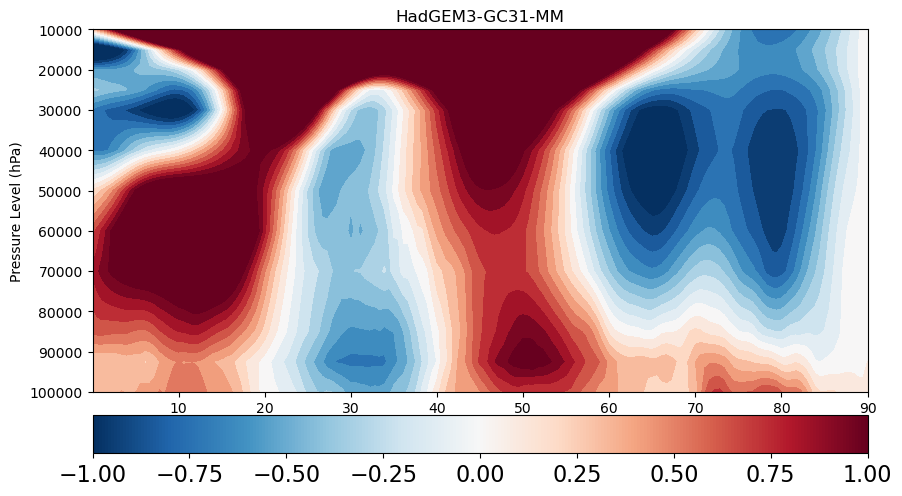

In [22]:
#ds_lonmean.ua.sel(time='1850-01-16').plot()
fig, axes = plt.subplots(nrows=1, ncols=1) #, figsize=(15,15))
ax = plt.subplot(1,1,1)
cmap = plt.get_cmap('RdBu_r')
plt.contourf(ds_lonmean.lat, ds_lonmean.plev, ds_lonmean_yrsdiff, cmap='RdBu_r', levels=np.arange(-1,1,0.1), extend='both')

#plt.pcolormesh(ds_lonmean.lat, ds_lonmean.plev, ds_lonmean_yrsdiff.ua.values, cmap='RdBu_r')
plt.xlabel('Lat')
plt.ylabel('Pressure Level (hPa)')
plt.ylim([100000, 10000])
plt.title('HadGEM3-GC31-MM')
#axs=np.append(axs,ax)

normalize=matplotlib.colors.Normalize(vmin=-1, vmax=1)
cax, _ = matplotlib.colorbar.make_axes(ax, location = "bottom", pad=0.05)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize,orientation="horizontal")
#cbar.set_label('Zonal windspeed ',size=16)
cbar.ax.tick_params(labelsize=16)
plt.show()
